**These are the main Features/Columns available in the dataset :**

1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.

2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.

3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.

4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.

5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.

6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.

7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.

8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.

9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

10) Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.

11) Price: Target variable stores information of the ticket price.

**Questions posed on Kaggle**

Q.1. What are the airlines in the dataset, accompanied by their frequencies?

Q.2. Show Bar Graphs representing the Departure Time & Arrival Time.

Q.3. Show Bar Graphs representing the Source City & Destination City.

Q.4. Does price varies with airlines ?

Q.5. Does ticket price change based on the departure time and arrival time?

Q.6. How the price changes with change in Source and Destination?

Q.7. How is the price affected when tickets are bought in just 1 or 2 days before departure?

Q.8. How does the ticket price vary between Economy and Business class?

Q.9. What will be the Average Price of Vistara airline for a flight from Delhi to Hyderabad in Business Class ?

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import binom
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression #<-----
from sklearn.metrics import r2_score

In [2]:
#loading dataset
flights = pd.read_csv(r'C:\Users\rober\Documents\Data Science\Code (all)\Portfolio\Kaggle projects\Datasets\airlines_flights_data.csv')

In [3]:
#checking general info
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [4]:
#checking general statistical data
flights.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
index,300153.0,NaN,NaN,NaN,150076.0,86646.852011,0.0,75038.0,150076.0,225114.0,300152.0
airline,300153,6,Vistara,127859,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flight,300153,1561,UK-706,3235,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source_city,300153,6,Delhi,61343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
departure_time,300153,6,Morning,71146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stops,300153,3,one,250863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival_time,300153,6,Night,91538,NaN,NaN,NaN,NaN,NaN,NaN,NaN
destination_city,300153,6,Mumbai,59097,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,300153,2,Economy,206666,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,300153.0,NaN,NaN,NaN,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83


In [5]:
#checking for duplicates
flights.duplicated().sum()

np.int64(0)

In [6]:
for column in flights:
    if flights[column].dtype == 'object':
        print(f"Unique values in '{column}':")
        print(flights[column].value_counts())
        print("-"*25)

Unique values in 'airline':
airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64
-------------------------
Unique values in 'flight':
flight
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
6E-3211       1
6E-6474       1
6E-2914       1
SG-1058       1
6E-2939       1
Name: count, Length: 1561, dtype: int64
-------------------------
Unique values in 'source_city':
source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64
-------------------------
Unique values in 'departure_time':
departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64
-------------------------
Unique values in 'stops':
stops
one            250863
zero        

In [7]:
flights['stops'] = flights.stops.replace({'zero': 0, 'one': 1, 'two_or_more': 2})

C:\Users\rober\AppData\Local\Temp\ipykernel_24596\1158485710.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  flights['stops'] = flights.stops.replace({'zero': 0, 'one': 1, 'two_or_more': 2})


In [8]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  int64  
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 27.5+ MB


**Q1**

Vistara- 127,859 flights

Air_India- 80,892 flights

Indigo- 43,120 flights

GO_FIRST- 23,173 flights

AirAsia- 16,098 flights

SpiceJet- 9011 flights

**Q2**

Show Bar Graphs representing the Departure Time & Arrival Time.

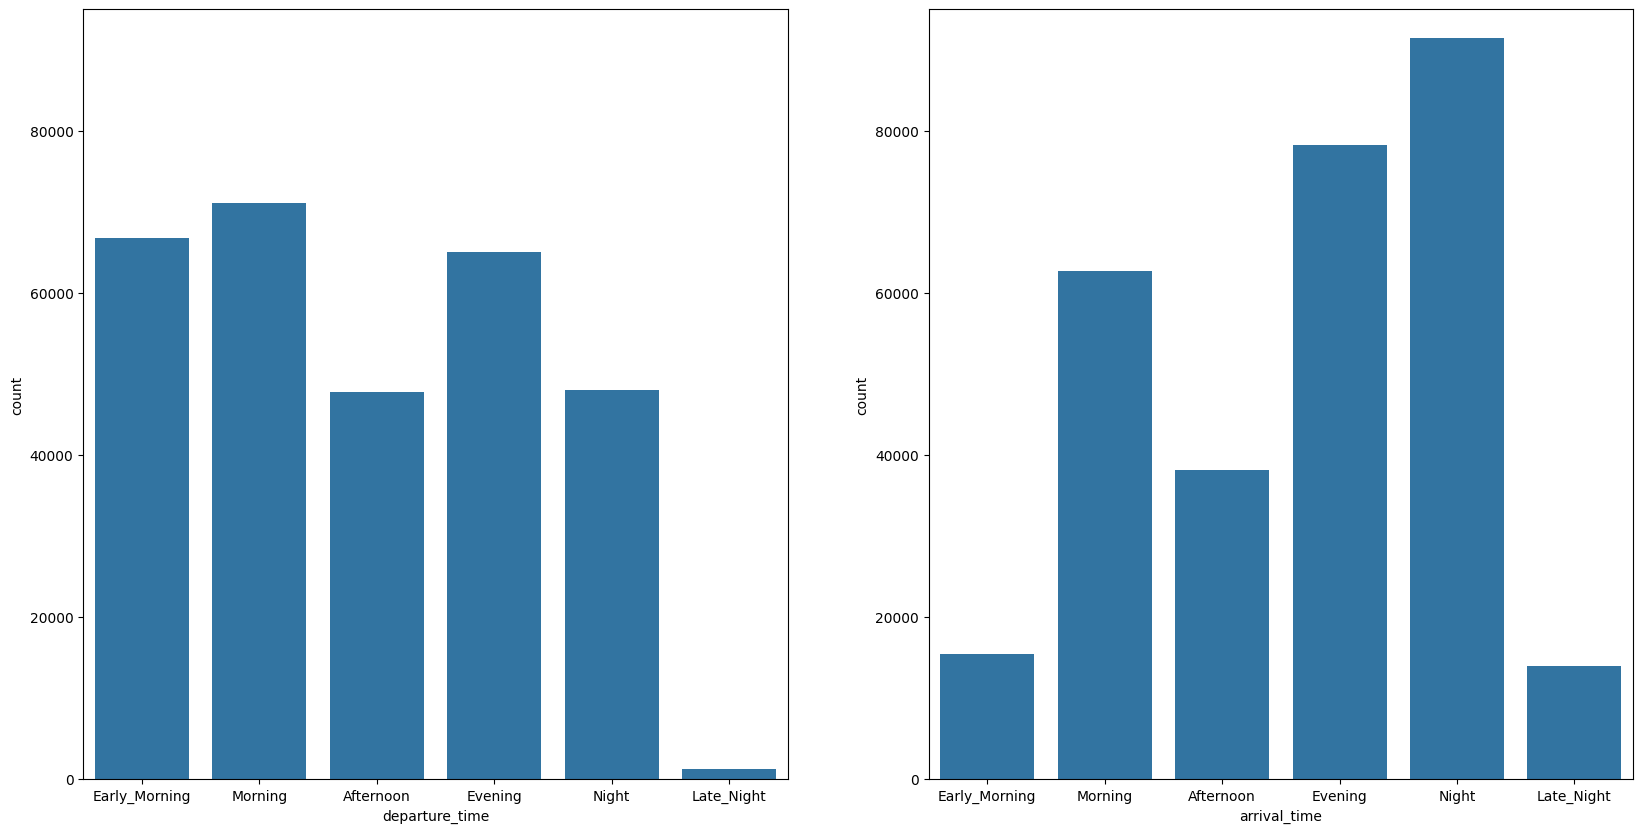

In [9]:
# Define the desired order for time bins
time_order = ['Early_Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late_Night']

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.ylim(0, 95000)
sns.countplot(data=flights,x='departure_time', order=time_order);
plt.subplot(1,2,2)
plt.ylim(0, 95000)
sns.countplot(data=flights,x='arrival_time', order=time_order);

**Q3**

Show Bar Graphs representing the Source City & Destination City.

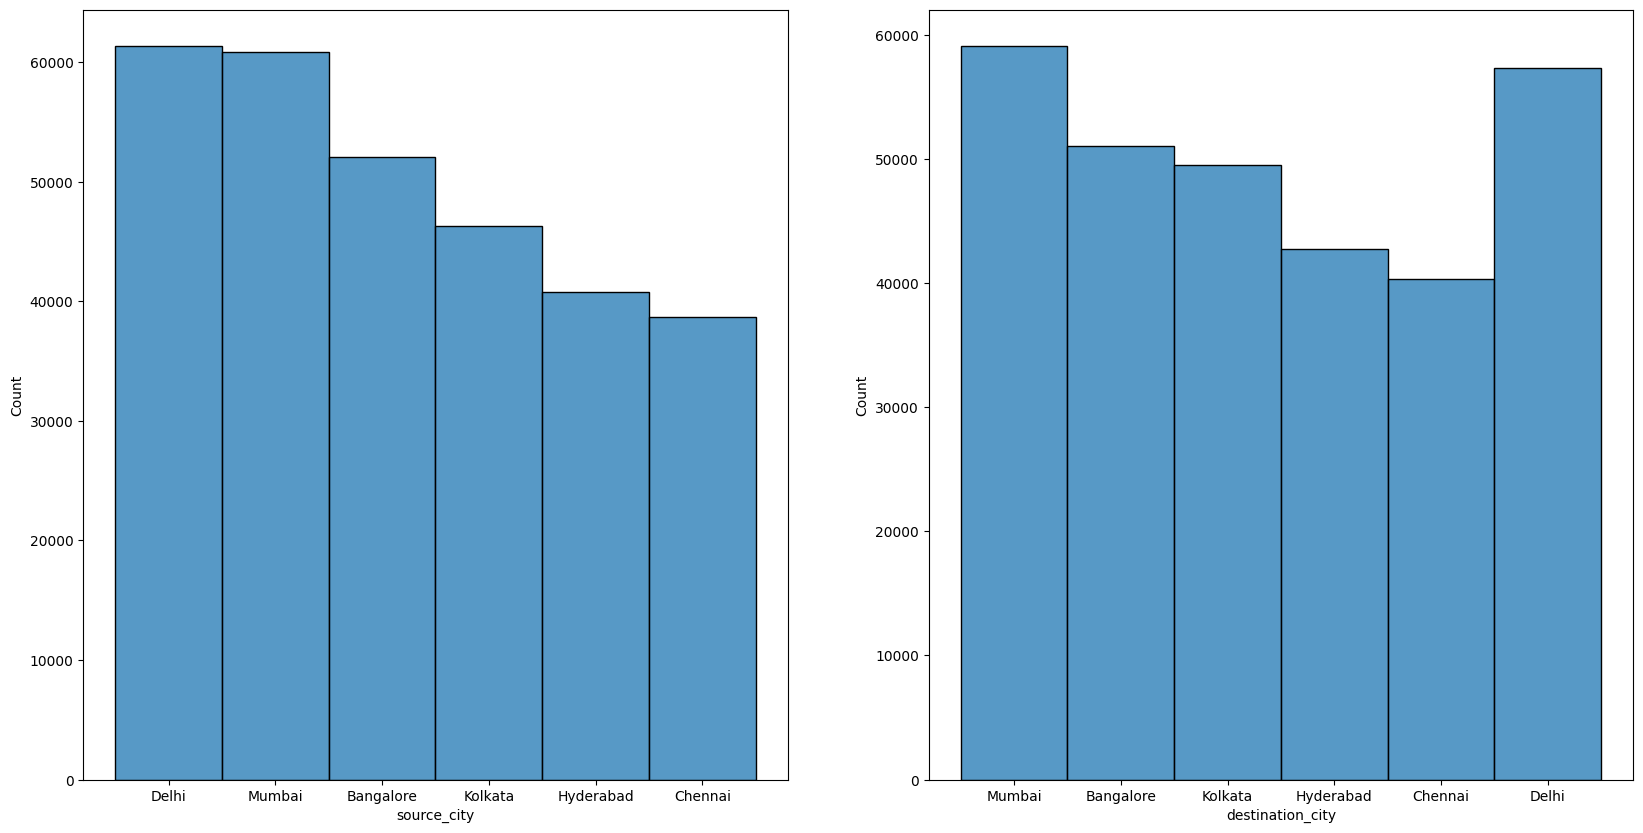

In [10]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.histplot(data=flights,x='source_city');
plt.subplot(1,2,2)
sns.histplot(data=flights,x='destination_city');

**Q4**

Does price vary with airlines?

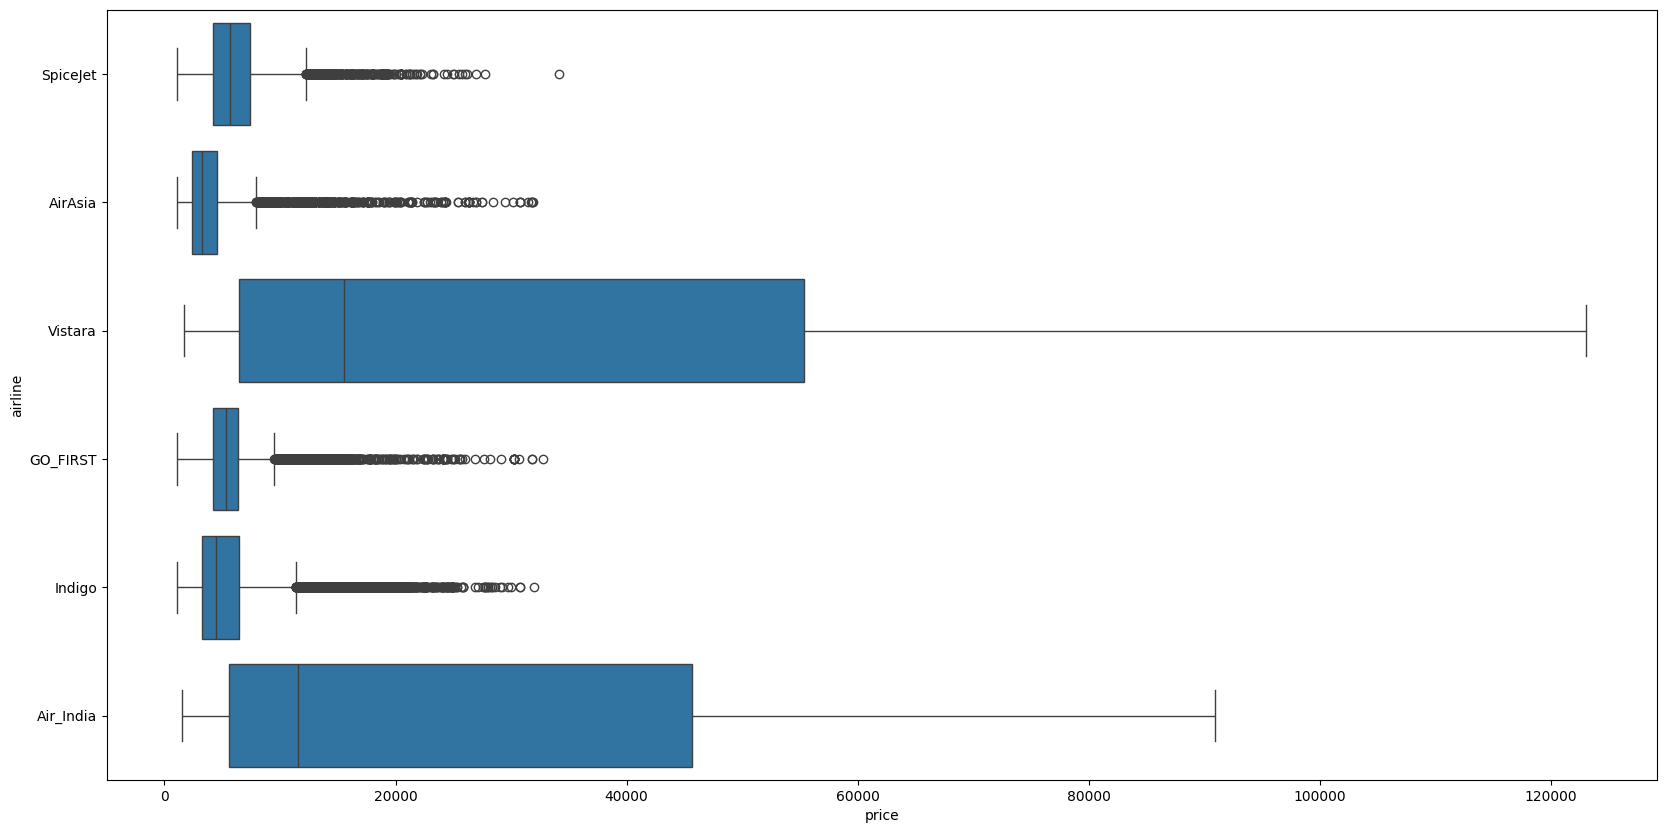

In [11]:
plt.figure(figsize=(20,10))
sns.boxplot(data=flights, x='price', y='airline')
plt.show()

**Observations**

Yes, the price of tickets do vary depending on the airline. Vistara has the priciest flights, while AirAsia has the lowest prices overall.

**Q5**

Does ticket price change based on the departure time and arrival time?

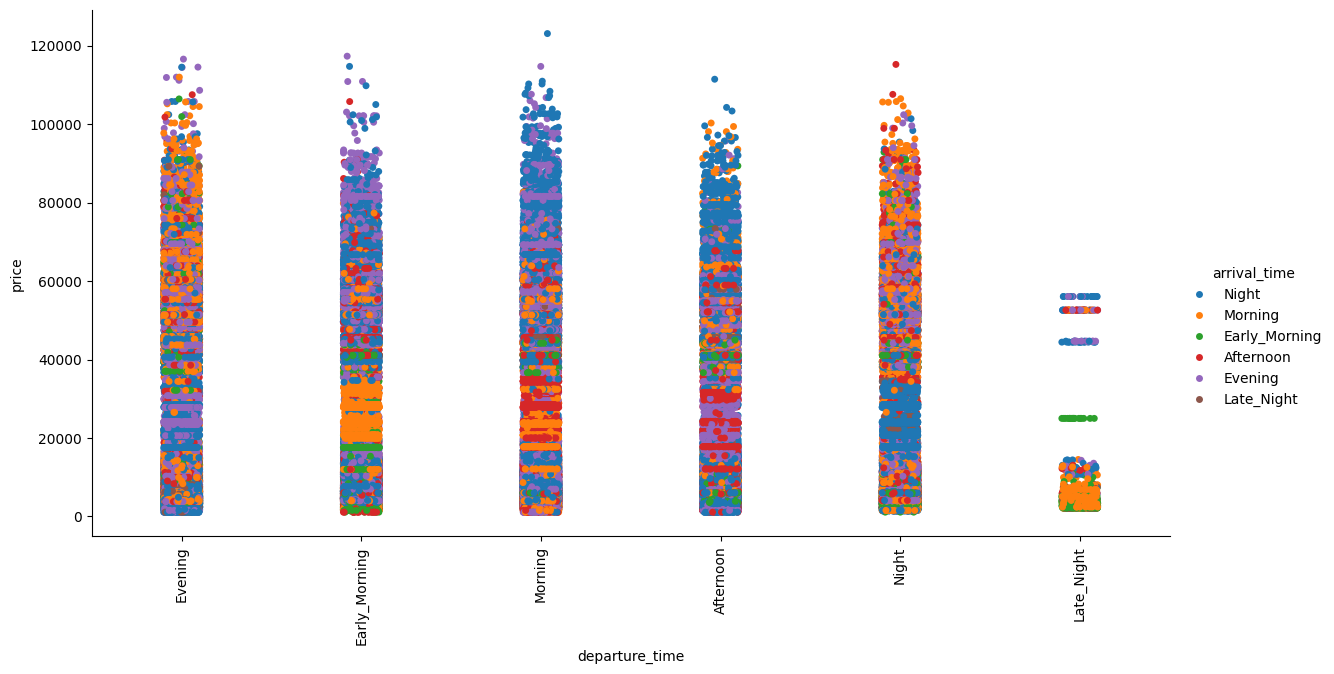

In [14]:
sns.catplot(data=flights, x='departure_time', y='price', hue='arrival_time', height= 6, aspect =2)
plt.xticks(rotation=90)
plt.show()

**Observations**

Flights departing late at night (i.e., red-eye flights) are cheaper overall.

Same-time flights MIGHT be cheaper, but the chart above does not distinguish between 24-flights. More investigation is warranted.

**Q6**

How does the price change with Source (departure city) and Destination?

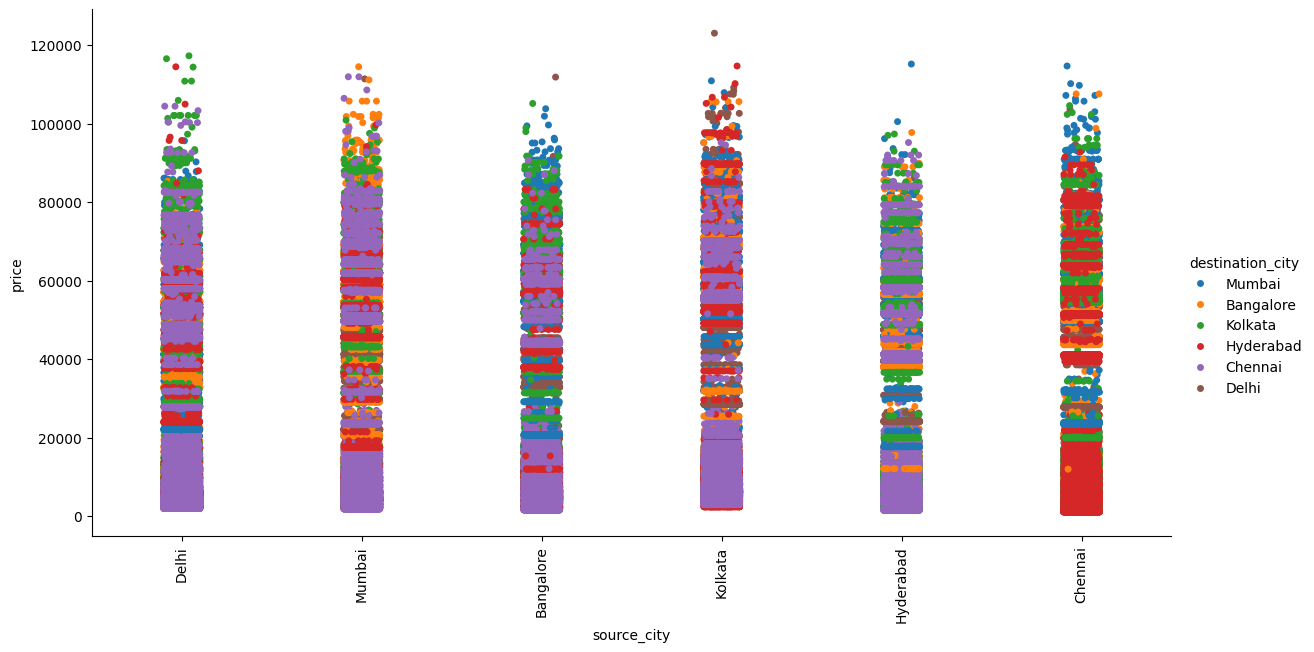

In [13]:
sns.catplot(data=flights, x='source_city', y='price', hue='destination_city', height= 6, aspect =2)
plt.xticks(rotation=90)
plt.show()

**Q7**

How is the price affected when tickets are bought in just 1 or 2 days before departure?

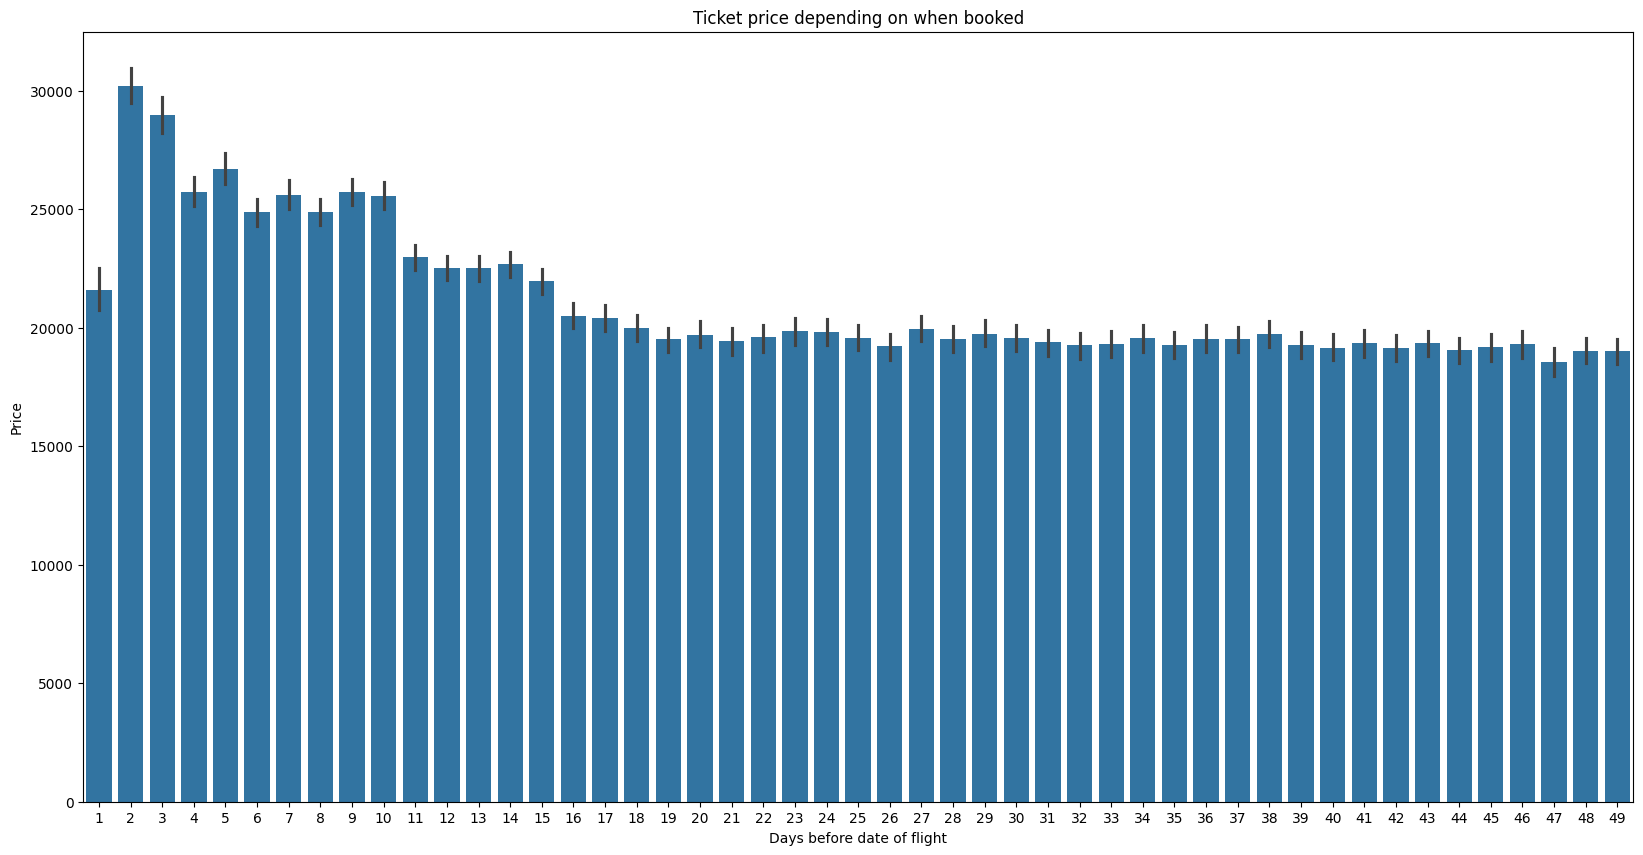

In [22]:
plt.figure(figsize=(20,10))
sns.barplot (data=flights, x='days_left', y='price')
plt.xlabel ('Days before date of flight')
plt.ylabel ('Price')
plt.title ("Ticket price depending on when booked")
plt.show()

**Observations**

The price of tickets are highest when booked two days before the date of departure. 

The price plateaus when booked 19 days out or more.

**Q8**

How does the ticket price vary between Economy and Business class?

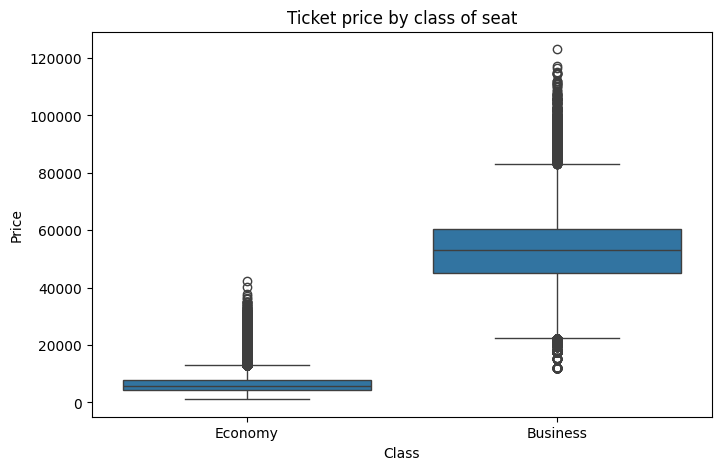

In [27]:
plt.figure(figsize=(8,5))
sns.boxplot (data=flights, x='class', y='price')
plt.xlabel ('Class')
plt.ylabel ('Price')
plt.title ("Ticket price by class of seat")
plt.show()


In [36]:
business_class_price = flights[flights['class'] == 'Business']['price'].mean()
economy_class_price = flights[flights['class']== 'Economy']['price'].mean()

print ('Average Business class price: $', (round(business_class_price,2)))
print ('Average Economy class price: $', (round(economy_class_price,2)))

Average Business class price: $ 52540.08
Average Economy class price: $ 6572.34


In [39]:
price_difference = (business_class_price/economy_class_price) *100
print('Price difference (Business/Economy): %', (round(price_difference,2)))

Price difference (Business/Economy): % 799.41


**Observations**

Business Class is much pricier than Economy class overall.

**Q9** 

What will be the Average Price of Vistara airline for a flight from Delhi to Hyderabad in Business Class ?

In [43]:
vistara_delhi_hyderabad = flights[(flights['airline'] == 'Vistara') & (flights['source_city'] == 'Delhi') & (flights['destination_city'] == 'Hyderabad')]['price'].mean()
print('Average price for Vistara flights from Delhi to Hyderabad: $', (round(vistara_delhi_hyderabad,2)))

Average price for Vistara flights from Delhi to Hyderabad: $ 23721.08
